
# **JOBSHEET 4 - KLASIFIKASI**

**Nama : Elis Nurhidayati**

**NIM : 2241720035**

**Kelas : TI-3C**

**Link Google Colab: https://colab.research.google.com/drive/1JgqVznTuFheZWozSBlEHfXggFSCYXXUs#scrollTo=0f3icLSuqad_**

# Praktikum 1
**Klasifikasi SVM dengan Data Dummy**

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

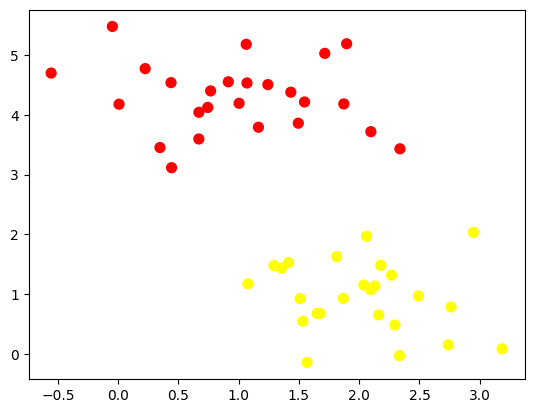

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Membuat sebuah model klasifikasi dengan garis pemisah data dari dua himpunan di atas. namun garis pemisah yang dibutuhkan lebih dari satu garis

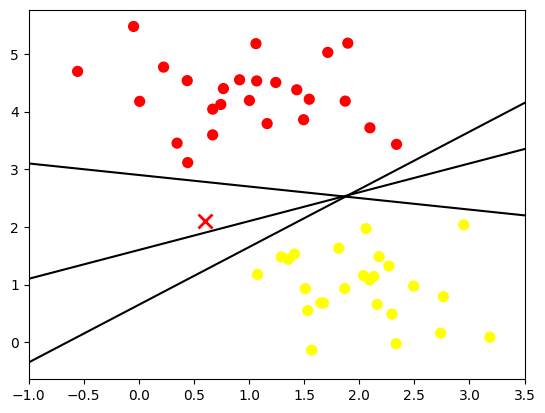

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
(-1.0, 3.5)
plt.show()

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.


---



Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

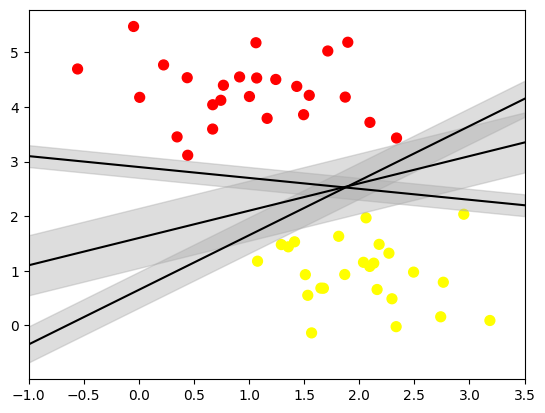

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)
(-1.0, 3.5)
plt.show()

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

---

## Penerapan Fitting SVM

In [7]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


SVC(C=10000000000.0, kernel='linear')

In [8]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

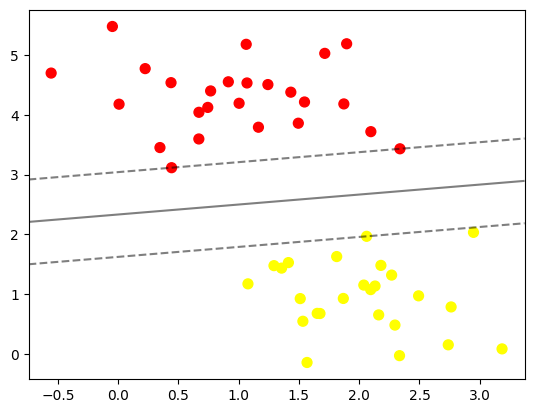

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [11]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

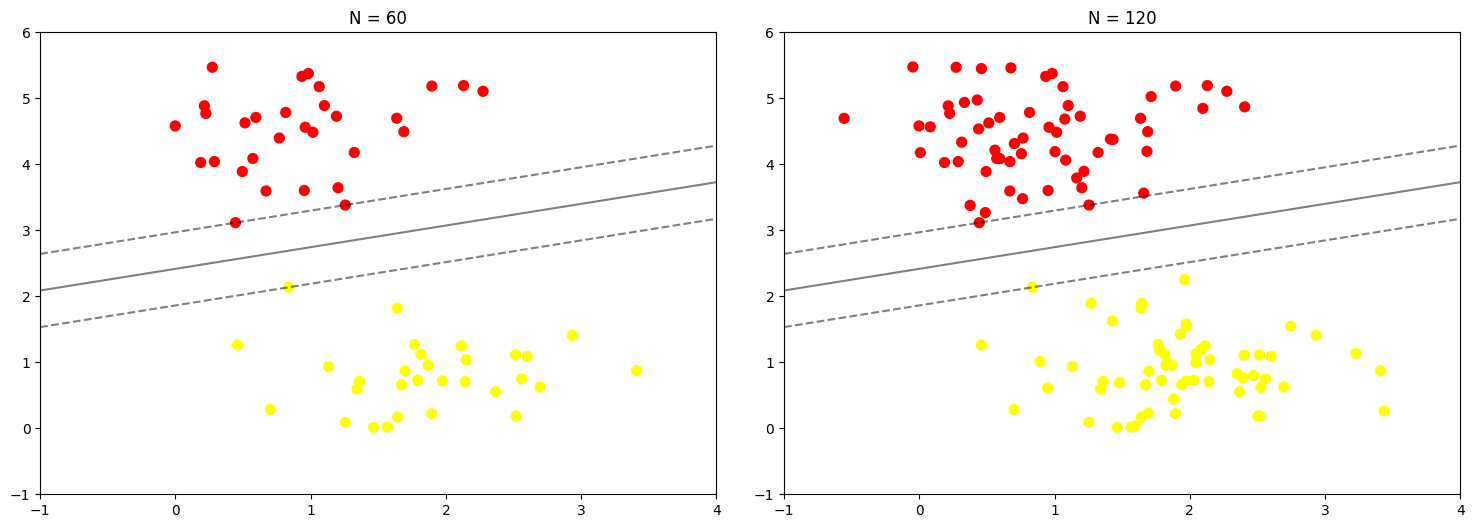

In [12]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

---

## Data Tidak Terpisah Secara Linier

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

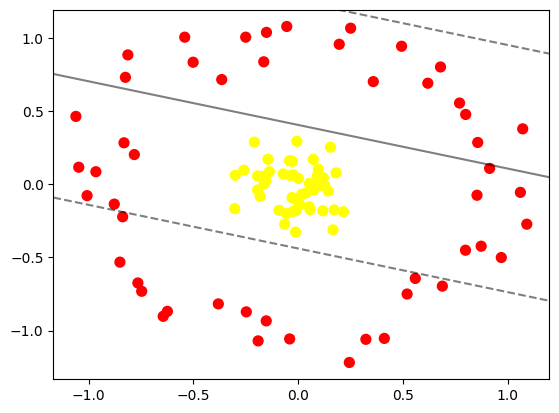

In [13]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [23]:
r = np.exp(-(X ** 2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.5016387 ,  0.83550988],
       [-0.25050131,  1.00692064],
       [ 0.91425628,  0.10928902],
       [-1.04783203,  0.11723782],
       [ 0.00679272, -0.13591665],
       [-0.01207709, -0.32632267],
       [-0.19392502, -0.03861134],
       [-0.13764785,  0.08678313],
       [-0.76546949, -0.67428381],
       [ 0.10551937,  0.04756665],
       [-0.05445235,  1.08009384],
       [ 0.67978747,  0.80307988],
       [ 0.01758368, -0.06811611],
       [-0.18127586, -0.08238777],
       [ 0.17191013, -0.17438625],
       [-0.02897891, -0.09026862],
       [ 0.87399576, -0.42282871],
       [ 0.0733342 , -0.03993704],
       [-0.85127364, -0.53195746],
       [ 0.19619198,  0.9582994 ],
       [-0.15133035,  1.03969729],
       [-0.07133523,  0.07170984],
       [-0.54176265,  1.00699418],
       [-0.87830554, -0.13502321],
       [ 0.49386867,  0.94482316],
       [-0.01055299, -0.17926896],
       [-1.00810221, -0.07714726],
       [ 0.0721471 ,  0.17097557],
       [-0.06436769, -0.27201629],
       [ 0.24438326, -1.2183427 ],
       [ 0.14410355, -0.0455495 ],
       [ 0.05755708, -0.17326599],
       [ 0.09164106,  0.05901201],
       [ 0.16642299, -0.31138818],
       [-0.96597061,  0.08649401],
       [ 0.05378568,  0.0066362 ],
       [-0.19117238, -1.0706773 ],
       [-0.30310984, -0.16610052],
       [-0.38130622, -0.81767569],
       [ 0.35882203,  0.70296171],
       [-0.74720469, -0.73120076],
       [-0.15383533,  0.02545847],
       [-0.62455445, -0.86854376],
       [-0.16421647,  0.83845844],
       [-0.04150857,  0.16229808],
       [-0.00487256, -0.10524924],
       [ 0.80012632,  0.47815241],
       [ 1.06121424, -0.05466597],
       [ 0.00136326,  0.04092368],
       [ 0.10766929, -0.00671845],
       [-0.82495274,  0.73230345],
       [ 0.97008543, -0.50042754],
       [-0.83805148, -0.22156074],
       [-0.15245912, -0.93383528],
       [ 1.09191468, -0.27235493],
       [-0.09178646, -0.17732033],
       [ 0.77075627,  0.55638833],
       [ 0.85756359,  0.28665835],
       [-0.16133429,  0.00609702],
       [ 0.1179119 , -0.18070988],
       [ 0.12039967,  0.04514661],
       [ 0.06629134, -0.0037555 ],
       [ 1.07236966,  0.37985256],
       [-0.02448366, -0.18462415],
       [-0.05582618, -0.19813278],
       [-0.81329556,  0.88574784],
       [-0.00264732, -0.09659392],
       [-0.19334887,  0.05734083],
       [-0.03703226,  0.06043851],
       [ 0.85403636, -0.07434158],
       [ 0.05303786, -0.15433903],
       [ 0.03845246, -0.05821094],
       [ 0.15446582,  0.25419782],
       [-0.04056386, -1.0571848 ],
       [-0.25929559,  0.09687248],
       [ 0.32344985, -1.05996681],
       [ 0.25059624,  1.06837986],
       [ 0.61914236,  0.69198097],
       [ 0.18103263,  0.07883938],
       [-0.16866724,  0.05427163],
       [-0.6445538 , -0.90245985],
       [-0.00616298,  0.29484112],
       [-0.36501775,  0.71694782],
       [-0.78240325,  0.20383758],
       [ 0.41147951, -1.05364009],
       [ 0.0963795 ,  0.10362086],
       [-0.8317036 ,  0.28433464],
       [ 0.7991852 , -0.45032382],
       [-0.14429212,  0.17206966],
       [ 0.12749266, -0.00766711],
       [ 0.55937884, -0.64323325],
       [ 0.68854349, -0.69619225],
       [ 0.52025514, -0.75013642],
       [-1.06150937,  0.4648217 ],
       [ 0.21598982, -0.18692233],
       [-0.02402358,  0.06552381],
       [-0.24773457, -0.87217412],
       [-0.20902249,  0.28913202],
       [-0.30047253,  0.06246707],
       [-0.02822431,  0.15750051]]), y=array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]))>

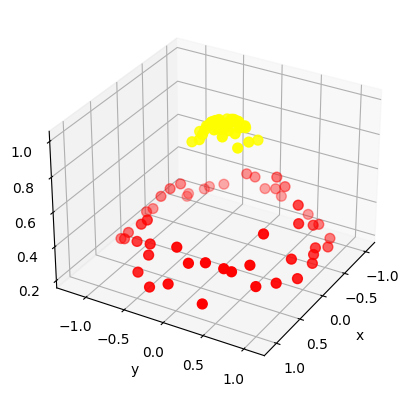

In [27]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=(-90, 90), azim=(-180, 180),
         X=fixed(X), y=fixed(y))


walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [28]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

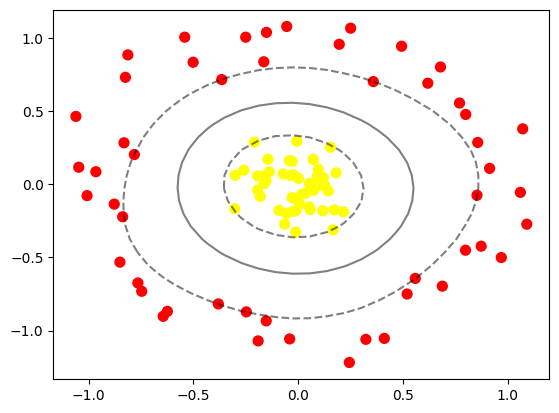

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

---

## Data Overlap

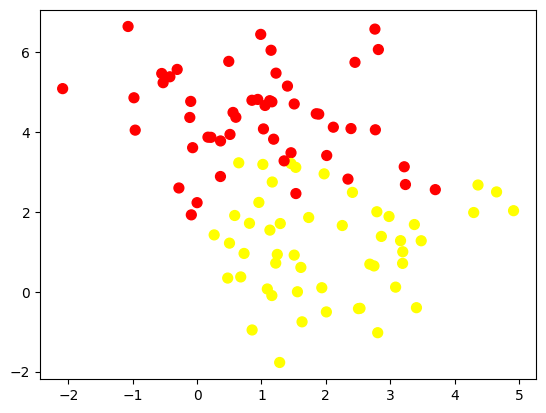

In [30]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

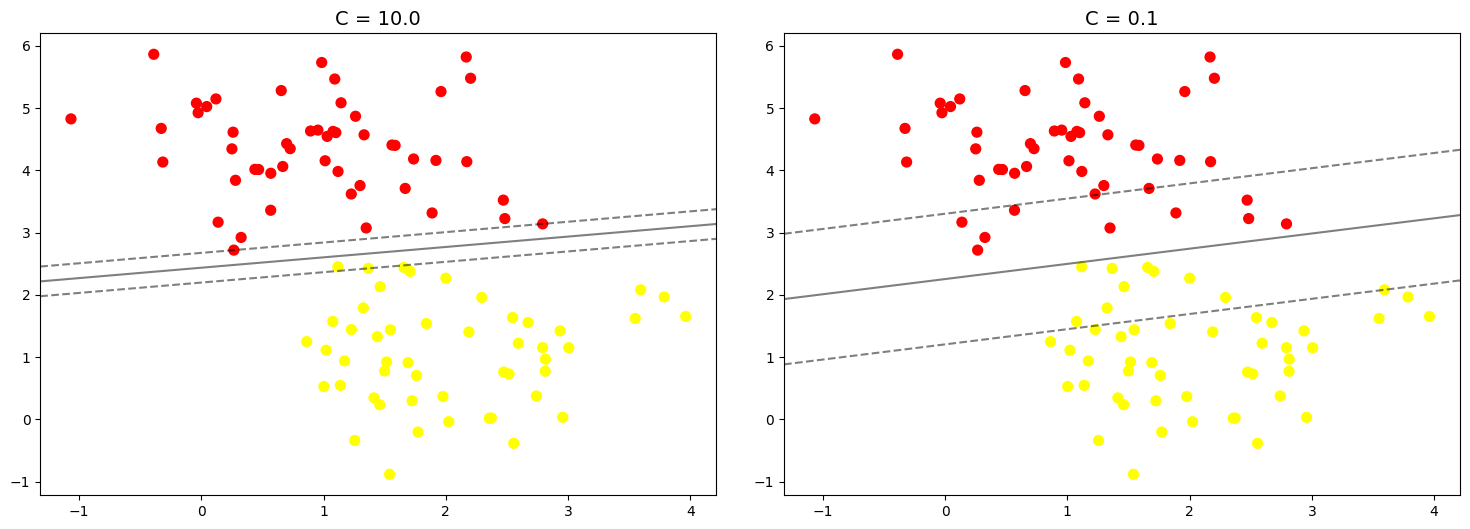

In [31]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Nilai optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa)

---

# Praktikum 2
**Klasifikasi SVM Pada Data Citra**

Link dataset: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset

In [32]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


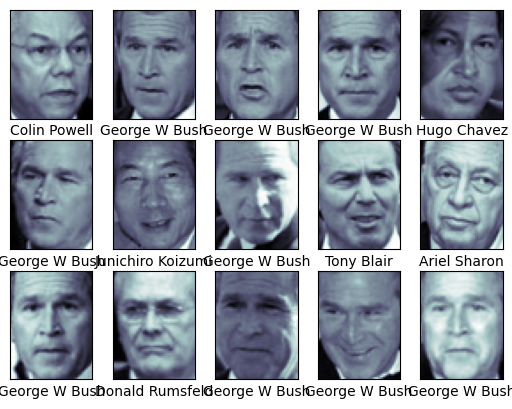

In [33]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [34]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [35]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 39s, sys: 26.6 s, total: 2min 6s
Wall time: 1min 19s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


## Prediksi Label untuk Data Testing

In [37]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

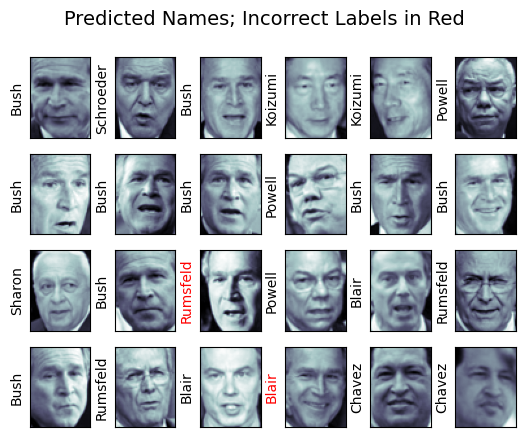

In [38]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

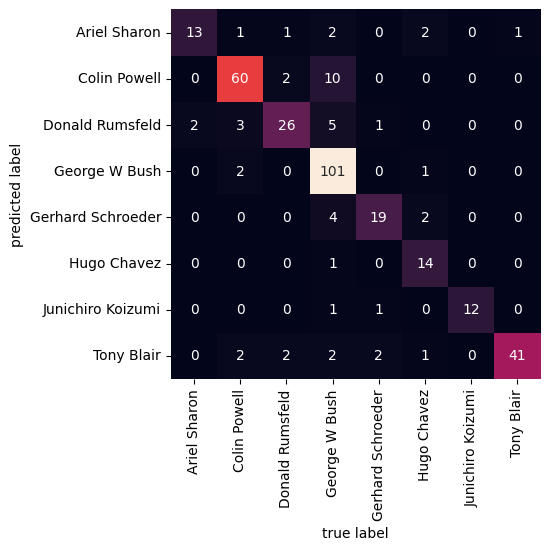

In [40]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

---

# Praktikum 3
**Klasifikasi Naive Bayes dengan Data Dummy**

Pada percobaan ini kita akan menggunakan data dummy (sintentis) untuk membuat sebuah model Naive Bayes. Untuk membuat data dummy, kita dapat menggunakan fungsi make_classification dari library scikit-learn. Selanjutnya, kita akan membuat model Multinomial Naive Bayes dengan menggunakan MultinomialNB dan model Gaussian Naive Bayes menggunakan GaussianNB.

## Mendefiniskan Data Dummy

In [41]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[330 140]
 [173 117]
 [177 113]
 [151 108]
 [149 107]
 [ 80  90]
 [108 100]
 [ 25  89]
 [ 40   3]
 [183   9]
 [ 16 162]
 [  8 148]
 [ 94 126]
 [ 48 131]
 [ 43 298]
 [ 72 161]
 [ 67 120]
 [ 52  56]
 [ 47 118]
 [121  99]
 [  6  70]
 [ 25  68]
 [122  79]
 [ 28  59]
 [112 108]
 [ 56  78]
 [ 66  63]
 [ 54  74]
 [ 24  45]
 [374 256]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


Parameter yang digunakan pada fungsi make_classification adalah,

* n_samples: jumlah sampel yang diinginkan
* n_features: jumlah fitur yang digunakan
* n_classes: jumlah kelas
* n_informative: jumlah fitur yang memiliki korelasi dengan kelas
* n_redundant: jumlah fitur yang tidak memiliki korelasi dengan kelas
* n_repeated: jumlah fitur yang diulang

## (Opsional) Membuat Data Frame

In [42]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,330,140,0
1,173,117,0
2,177,113,0
3,151,108,0
4,149,107,0


Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [43]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,330,140,Kelas B
1,173,117,Kelas B
2,177,113,Kelas B
3,151,108,Kelas B
4,149,107,Kelas B


## (Opsional) Visualisasi Data

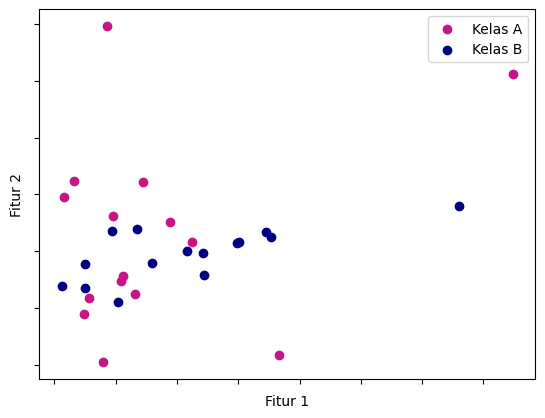

In [44]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

## Klasifikasi Multinomial Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6666666666666666
Hasil akurasi data test: 0.6666666666666666


## Klasifikasi Gaussian Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.8095238095238095
Hasil akurasi data test (Gaussian): 0.5555555555555556


---

# Praktikum 4
**Klasifikasi Naive Bayes pada Data Multinommial**

Nilai multinomial adalah data yang nilainya didapatkan dari proses menghitung. Sehingga, pada konteks fitur, nilai multinomial fitur berdasarkan proses perhitungan (counting) probabilitas kemunculan fitur tersebut dalam sebuah data. Contoh klasik fitur multinomial adalah perhitungan jumlah kata pada klasifikasi teks.Pada percobaan ini, kasus klasifikasi teks diberikan untuk mempermudah pemahaman terhadap algoritma Naive Bayes tipe Multinomial.

Kita akan menggunakan data spam.csv yang berisi data teks sms dengan label spam dan ham. Spam adalah sms sampah, sedangkan ham adalah sebaliknya

## Load Data

In [48]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Elis - 3C/SMT 5/ML/Jobsheet 4/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Pra Pengolahan Data
Beberapa hal yang akan dilakukan pada tahap ini yaitu,

1. Drop kolom yang tidak digunakan
2. Ubah nama kolom v1 (label) dan v2 (teks sms)
3. Inspeksi Data
4. Encode label
5. Memisahkan fitur dengan label

**1. Drop Kolom**

In [49]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**2. Ubah Nama Kolom V1 dan V2**

In [50]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**3. Inspeksi Data**

In [51]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


**4. Encode Label**

In [52]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**5. Memisahkan Fitur dengan Label**

In [53]:
X = df['SMS'].values
y = df['Labels'].values

## Ekstraksi Fitur

Ekstraksi fitur untuk setiap SMS akan menggunakan konsep Bag of Words. Kita dapat menggunakan fungsi CountVectorizer dari scikit-learn. Akan tetapi untuk mencegah leaking information kita akan melakukan split data terlebih dahulu, baru melakukan transformasi terhadap data training dan testing.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


## Training dan Evaluasi Model
Menggunakan algoritma Multinomial Naive Bayes (Fungsi MultinomialNB) dari scikit-learn

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


---

# Praktikum 5
**Klasifikasi Citra Siang dan Malam**

Pada percobaan ini kita akan mencoba melakukan klasifikasi pada dua label citra, yaitu siang dan malam. Percobaan ini akan memberikan pengalaman bagi Anda untuk melakukan proses pra pengolahan data, ekstraksi fitur, dan melakukan klasifikasi dengan menggunakan classifier sederhana dan SVM.

## Langkah 0 - Import Library

In [61]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [62]:
# Ekstraksi data gambar dan definisikan lokasi gambar
# Image directories
train_dir = "/content/drive/MyDrive/Elis - 3C/SMT 5/ML/Jobsheet 4/images/training"
test_dir = "/content/drive/MyDrive/Elis - 3C/SMT 5/ML/Jobsheet 4/images/test"

## Langkah 1 - Load Data dan Visualisasikan

In [65]:
# Fungsi membuat daftar path gambar
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [66]:
# Load training data
train_img = load_dataset(train_dir)

In [67]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 'night')

In [68]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 10
(372, 640, 3)


In [69]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (555, 800, 3)
Label	: day


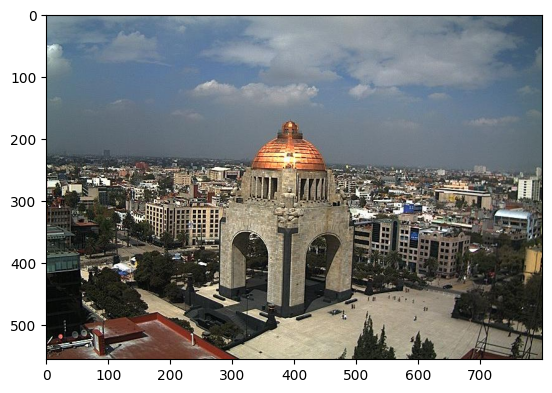

In [70]:
# Visualisasi gambar secara acak
random_img_viz(train_img)

## Langkah 3 - Pra pengolahan Data

Standarisasi ukuran gambar dan *encoding* label gambar

In [71]:
# Fungsi standarisasi
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [72]:
# Fungsi encoding label
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [73]:
# Fungsi keduanya
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [74]:
# pra pengolahan data pada data training
train_std_img_list = preprocess(train_img)

In [75]:
# pengecekan ukuran gambar secara acak
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 183
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 1


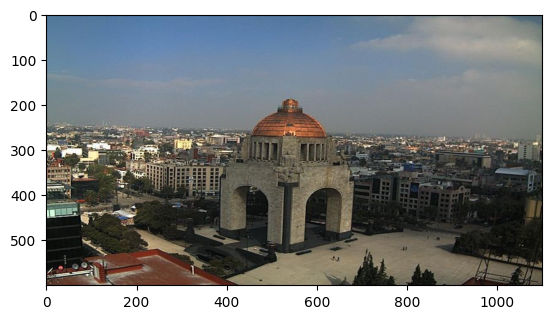

In [83]:
random_img_viz(train_std_img_list)

## Lankah 4 - Ekstraksi Fitur


Untuk membedakan label, kita memerlukan fitur yang dapat membedakan data, salah satunya adalah nilai rata-rata kecerahan gambar. Untuk menghitung kecerahan, gambar diubah dari ruang warna RGB ke HSV karena tingkat kecerahan lebih mudah diperoleh dari komponen Value (V) pada HSV.

In [77]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 222
Avg Brighness: 112.0085


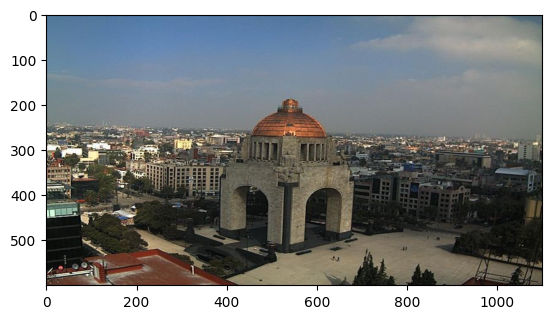

In [91]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## Langkah 5 - Klasifikasi dengan Metode Threshold

Lakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

In [92]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 24
Actual label: 0
Predicted label: 0


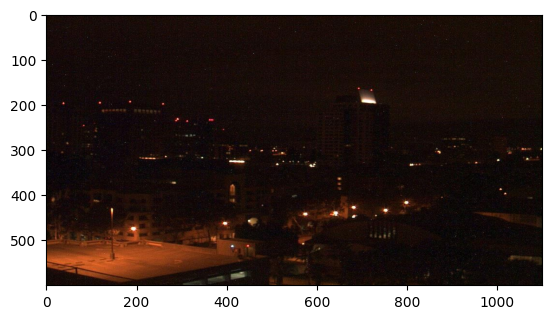

In [116]:
# Pengecekan prediksi secara acak pada data training
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## Langkah 6 - Evaluasi

Membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep *confussion matrix*.

In [117]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [118]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [119]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


## Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM

### Langkah 4 alternatif - Membuat Feature Vectors

Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

In [122]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [123]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,13.262067,0.0
1,14.534517,0.0
2,8.305362,0.0
3,13.750727,0.0
4,110.350603,0.0


In [124]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,90.797277,0.0
1,87.567647,0.0
2,82.955830,0.0
3,82.367332,0.0
4,83.945986,0.0


### Langkah 5 Alternatif

Membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [125]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

### Langkah 6 Alternatif

Melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [127]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Hasil akurasi dengan model SVM')
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Hasil akurasi dengan model SVM
Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9
